# Pandas as a toolbox

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

## This is a header

### run the following command once on a terminal to install pandasql
### pip install pandasql

In [5]:
try:
    import pandasql as ps
except:
    os.system("pip install pandasql")

In [6]:
df = pd.read_csv('data/iris.csv')
print(type(df))
df.head(10)

<class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [7]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [10]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [11]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [12]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [13]:
tips.sex.unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

## Who pay more tips, Male or Female?

## Using SQL

In [16]:
sql = "select sex, avg(tip) from tips where sex = 'Female'"
df = ps.sqldf(sql)
df

,sex,avg(tip)
0,Female,2.833448


In [17]:
sql = "select sex, count(*), avg(tip) from tips group by sex"
print(ps.sqldf(sql))

      sex  count(*)  avg(tip)
0  Female        87  2.833448
1    Male       157  3.089618


## Answer same questions using Pandas syntax

In [19]:
print(tips['tip'].mean())

2.99827868852459


In [20]:
tips.shape

(244, 7)

In [21]:
tips['sex'] == 'Female'

0       True
1      False
2      False
3      False
4       True
       ...  
239    False
240     True
241    False
242    False
243     True
Name: sex, Length: 244, dtype: bool

In [22]:
print(tips[tips['sex'] == 'Female'] ['tip'].mean())

2.8334482758620685


In [23]:
df = tips[tips['sex'] == 'Female']

In [24]:
print(df)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
11        35.26  5.00  Female     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
16        10.33  1.67  Female     No   Sun  Dinner     3
..          ...   ...     ...    ...   ...     ...   ...
226       10.09  2.00  Female    Yes   Fri   Lunch     2
229       22.12  2.88  Female    Yes   Sat  Dinner     2
238       35.83  4.67  Female     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[87 rows x 7 columns]


In [25]:
print(tips[tips['sex'] == 'Male'] ['tip'].mean())

3.0896178343949043


## Who pay more tips, Smoker or Non-Smoker?

In [27]:
sql = "select smoker, count(*), avg(tip) from tips group by smoker"
print(ps.sqldf(sql))

  smoker  count(*)  avg(tip)
0     No       151  2.991854
1    Yes        93  3.008710


In [28]:
print(tips.groupby(['smoker']).count())
tips.groupby(['smoker']).mean()

        total_bill  tip  sex  day  time  size
smoker                                       
Yes             93   93   93   93    93    93
No             151  151  151  151   151   151


/var/folders/54/wkbn7sg16737fs9875v7bgl40000gn/T/ipykernel_74252/322787854.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(tips.groupby(['smoker']).count())
/var/folders/54/wkbn7sg16737fs9875v7bgl40000gn/T/ipykernel_74252/322787854.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(['smoker']).mean()


TypeError: category dtype does not support aggregation 'mean'

## When will people tend to pay more Tips, Dinner or Lunch?

In [37]:
sql = "select time, count(*), avg(tip) from tips group by time"
print(ps.sqldf(sql))

     time  count(*)  avg(tip)
0  Dinner       176  3.102670
1   Lunch        68  2.728088


In [39]:
tips.groupby(['time']).mean()

/var/folders/54/wkbn7sg16737fs9875v7bgl40000gn/T/ipykernel_74252/793139560.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(['time']).mean()


TypeError: category dtype does not support aggregation 'mean'

## Group By using Pandas with more than one attributes

In [42]:
tips.groupby(['sex','smoker','time']).mean()

/var/folders/54/wkbn7sg16737fs9875v7bgl40000gn/T/ipykernel_74252/715150746.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(['sex','smoker','time']).mean()


TypeError: category dtype does not support aggregation 'mean'

In [44]:
tips.groupby(['sex'])['tip'].mean()

/var/folders/54/wkbn7sg16737fs9875v7bgl40000gn/T/ipykernel_74252/2844327552.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(['sex'])['tip'].mean()


sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [46]:
## Simple plots using Pandas

<Axes: xlabel='total_bill', ylabel='tip'>

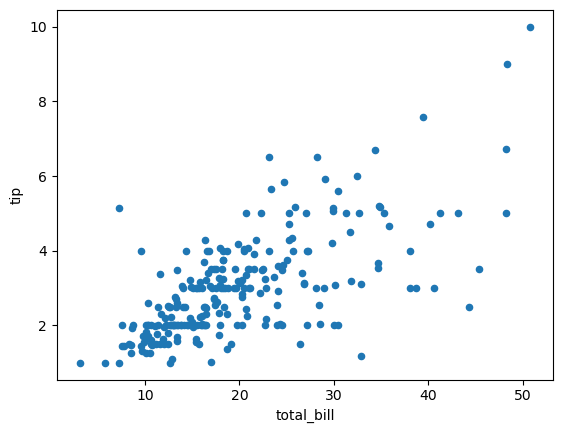

In [48]:
tips.plot.scatter(x='total_bill', y='tip')

/var/folders/54/wkbn7sg16737fs9875v7bgl40000gn/T/ipykernel_74252/2946917802.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips['tip'].hist(by=tips['sex'])


array([<Axes: title={'center': 'Male'}>,
       <Axes: title={'center': 'Female'}>], dtype=object)

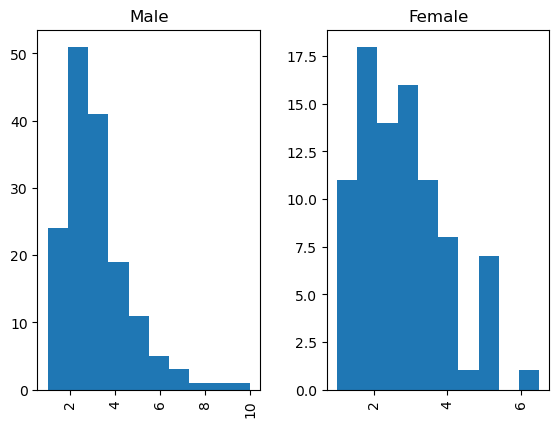

In [50]:
tips['tip'].hist(by=tips['sex'])

## Correlation

In [52]:
tips.corr()

ValueError: could not convert string to float: 'No'

# What is the average tips as percent of the total bill?

## First we need to calculate an extra "Percent" column

In [ ]:
tips['percent'] = tips['tip'] /tips['total_bill']

In [ ]:
tips['tips_minus_3'] = tips['tip'] - 3

In [ ]:
tips.head()

In [ ]:
tips.percent.mean()

In [ ]:
tips.groupby(['sex'])['percent'].mean()

## Female tips more generously while they pay less in absolute dollars amount in tip. Why?

## Would it be because Male spend more in dinner or lunch? Let's check

In [ ]:
tips.groupby(['sex'])['total_bill'].mean()

## So one has to be careful what questions you are asking!!!  Answer can be different

## Need an Analytical Mind, not just calculating some numbers or running a library

## Missing Data and Outliers

## Load a similar dataset

In [ ]:
tips2 = pd.read_csv('data/tips2.csv')
tips2['percent'] = tips2['tip'] /tips2['total_bill']

In [ ]:
tips2.groupby(['sex'])['tip'].mean()

In [ ]:

tips2.groupby(['sex'])['percent'].mean()

## This dataset has Female paying higher tip both in absolute dollar amount as well as in percentage

## But let's check for null and outliers

In [ ]:
tips2.isnull().any()

In [ ]:
tips2.plot.scatter(x='total_bill', y='tip')

## Other ways to check for outliers

In [ ]:
tips2.tip.describe()

In [ ]:
sns.boxplot(x=tips2['tip'])

## Remove outliers and Null

In [ ]:
print(tips2.shape)
tips2.dropna(inplace=True)
print(tips2.shape)

In [ ]:
tips2[ tips2.percent > 0.6]

In [ ]:
tips2 = tips2[tips2.percent < 0.8]
tips2.shape

## Now Female pay a lower amount of tip

In [ ]:
tips2.groupby(['sex'])['tip'].mean()

In [ ]:
tips2.groupby(['sex'])['percent'].mean()